<a href="https://colab.research.google.com/github/shlok-py/SocialMediaUsageandEmotionalWellbeing/blob/main/DMminiProjectFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset Introduction

**Link:** [Social Media Usage and Emotional Well being](https://www.kaggle.com/datasets/emirhanai/social-media-usage-and-emotional-well-being/)

**Social Media Usage and Emotional Well-Being**

This unique dataset was meticulously researched and prepared by AI Inventor Emirhan BULUT. It captures valuable information on social media usage and the dominant emotional state of users based on their activities. The dataset is ideal for exploring the relationship between social media usage patterns and emotional well-being.

**Features:**

`User_ID:` Unique identifier for the user.

`Age:` Age of the user.

`Gender:` Gender of the user (Female, Male, Non-binary).

`Platform:` Social media platform used (e.g., Instagram, Twitter, Facebook,
LinkedIn, Snapchat, Whatsapp, Telegram).

`Daily_Usage_Time (minutes):` Daily time spent on the platform in minutes.

`Posts_Per_Day:` Number of posts made per day.

`Likes_Received_Per_Day:` Number of likes received per day.

`Comments_Received_Per_Day:` Number of comments received per day.

`Messages_Sent_Per_Day:` Number of messages sent per day.

`Dominant_Emotion:` User's dominant emotional state during the day (e.g.,Happiness, Sadness, Anger, Anxiety, Boredom, Neutral).

**Files:**

`train.csv:` Data for training models.

`test.csv:` Data for testing models.

`val.csv:` Data for validation purposes.

**Usage:**

This dataset can be used for various analyses, including but not limited to:

* Predicting users' emotional well-being based on their social media usage.

* Clustering users based on usage patterns.

* Examining the impact of different platforms on users' emotions.

**Attribution:**

You can use this dataset ethically and responsibly in accordance with the MIT

license for educational and research purposes. If you use this dataset in your

work, a citation or reference to this dataset would be appreciated.
<hr>

## Our Research Question

* Age and gender emotional response
    * How does the age of users correlate with their dominant emotional state? Are there specific age groups that tend to experience certain emotions more frequently when using social media?
    * What are the differences in emotional well-being between genders based on social media usage? Are there specific platforms where one gender reports significantly different emotional states compared to another?
* Platform influence on Dominant emotion
    * Which social media platform is most associated with each dominant emotion (e.g., Happiness, Sadness, Anger)?
* Temporal Patterns and Emotional States:
    * How does increased usage of social media correlate with changes in dominant emotional states?

# 1.1 Loading datasets
## Loading dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from sklearn.preprocessing import LabelEncoder


In [2]:
'''
Read the data from the path and show top 5 rows
'''
df = pd.read_csv("./train(1).csv")
df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,1,25,Female,Instagram,120.0,3.0,45.0,10.0,12.0,Happiness
1,2,30,Male,Twitter,90.0,5.0,20.0,25.0,30.0,Anger
2,3,22,Non-binary,Facebook,60.0,2.0,15.0,5.0,20.0,Neutral
3,4,28,Female,Instagram,200.0,8.0,100.0,30.0,50.0,Anxiety
4,5,33,Male,LinkedIn,45.0,1.0,5.0,2.0,10.0,Boredom


In [3]:
'''
Data info and description
'''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User_ID                     1001 non-null   object 
 1   Age                         1001 non-null   object 
 2   Gender                      1000 non-null   object 
 3   Platform                    1000 non-null   object 
 4   Daily_Usage_Time (minutes)  1000 non-null   float64
 5   Posts_Per_Day               1000 non-null   float64
 6   Likes_Received_Per_Day      1000 non-null   float64
 7   Comments_Received_Per_Day   1000 non-null   float64
 8   Messages_Sent_Per_Day       1000 non-null   float64
 9   Dominant_Emotion            1000 non-null   object 
dtypes: float64(5), object(5)
memory usage: 78.3+ KB


In [4]:
df.describe()

,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,95.950000,3.321000,39.898000,15.611000,22.560000
std,38.850442,1.914582,26.393867,8.819493,8.516274
min,40.000000,1.000000,5.000000,2.000000,8.000000
25%,65.000000,2.000000,20.000000,8.000000,17.750000
50%,85.000000,3.000000,33.000000,14.000000,22.000000
75%,120.000000,4.000000,55.000000,22.000000,28.000000
max,200.000000,8.000000,110.000000,40.000000,50.000000


# 1.2 Data cleaning and preprocessing

In [5]:
'''
Checking for null values
'''
df.isna().sum()

User_ID                       0
Age                           0
Gender                        1
Platform                      1
Daily_Usage_Time (minutes)    1
Posts_Per_Day                 1
Likes_Received_Per_Day        1
Comments_Received_Per_Day     1
Messages_Sent_Per_Day         1
Dominant_Emotion              1
dtype: int64

In [6]:
'''
Dropping the null values
'''
df.dropna(inplace = True)

In [7]:
'''
Checking for null values again
'''

df.isna().sum()

User_ID                       0
Age                           0
Gender                        0
Platform                      0
Daily_Usage_Time (minutes)    0
Posts_Per_Day                 0
Likes_Received_Per_Day        0
Comments_Received_Per_Day     0
Messages_Sent_Per_Day         0
Dominant_Emotion              0
dtype: int64

In [8]:
'''
viewing the data columns
'''
df.columns

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
       'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day', 'Dominant_Emotion'],
      dtype='object')

In [9]:
'''
Separating the categorical and numerical columns
'''
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['User_ID', 'Age', 'Gender', 'Platform', 'Dominant_Emotion'], dtype='object')
Index(['Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day',
       'Comments_Received_Per_Day', 'Messages_Sent_Per_Day'],
      dtype='object')


In [10]:
'''
Checking the unique values of each column
'''
num_cols = list(set(df._get_numeric_data()))
cat_cols = list(set(df.columns) - set(df._get_numeric_data())-set(['User_ID']))

In [11]:
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))

Unique values of  Dominant_Emotion {'Anger', 'Happiness', 'Boredom', 'Anxiety', 'Neutral', 'Sadness'}
Unique values of  Gender {'Female', '25', '27', '33', '22', '26', '35', '29', 'Male', '28', '23', '31', 'Non-binary', '34', '21', '32', '30', '24'}
Unique values of  Platform {'Instagram', 'LinkedIn', 'Whatsapp', 'Snapchat', 'Telegram', 'Twitter', 'Facebook'}
Unique values of  Age {'Female', '25', '27', '22', '33', '26', '35', '29', '23', '28', 'Male', '31', '34', 'Non-binary', '21', '32', '30', '24'}


Unique values of Gender { <font color='red' size = "3px">'22', '30','24', '21', '26', '28', '25', '32', '27', '33', '23', '31', '29', '35'</font>, Male, Female, Non-binary
}


Unique values of  Platform {'Twitter', 'Snapchat', 'Facebook', 'Telegram', 'LinkedIn', 'Whatsapp', 'Instagram'}

Unique values of  Age {'30', '22', '21', '24', , '26', '25', '32', '33', '27', '23', '31', '28', '35', '29', '34', <font color="red" size="3px">'Male', 'Female', 'Non-binary'</font> }

Unique values of  Dominant_Emotion {'Anxiety', 'Sadness', 'Neutral', 'Anger', 'Boredom', 'Happiness'}

In [12]:
'''
In the above code we see that some of the values of gender and age are replaced alternately so fixing them
'''
for i, row in df.iterrows():
    gender, age = row['Gender'], row['Age']
    if str(gender).isnumeric():
        swapage = gender
        df.at[i, 'Gender'] = age
        df.at[i, 'Age'] = swapage
    else:
        df.at[i, 'Gender'] = gender
        df.at[i, 'Age'] = age
for col in cat_cols:
    print('Unique values of ', col, set(df[col]))
# print('Unique values of User_ID', len(set(df['User_ID'])))


Unique values of  Dominant_Emotion {'Anger', 'Happiness', 'Boredom', 'Anxiety', 'Neutral', 'Sadness'}
Unique values of  Gender {'Female', 'Male', 'Non-binary'}
Unique values of  Platform {'Instagram', 'LinkedIn', 'Whatsapp', 'Snapchat', 'Telegram', 'Twitter', 'Facebook'}
Unique values of  Age {'25', '27', '22', '33', '26', '35', '29', '23', '28', '31', '34', '21', '32', '30', '24'}


In [13]:
'''
converting the age and user_id to numeric dtype (int)
'''
df['Age'] = df['Age'].apply(lambda x: int(x) if x.isnumeric() else 0)
df['User_ID'] = df['User_ID'].apply(lambda x: int(x) if x.isnumeric() else 0)

In [14]:
cat_coulmns  = df.select_dtypes(['object']).columns
num_coulmns  = df.select_dtypes(['number']).columns
print(cat_coulmns)
print(num_coulmns)

Index(['Gender', 'Platform', 'Dominant_Emotion'], dtype='object')
Index(['User_ID', 'Age', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day',
       'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
       'Messages_Sent_Per_Day'],
      dtype='object')


In [15]:
'''
Label Encoding the categorical columns
'''

le = LabelEncoder()
for col in cat_coulmns:
    df["encoded" + col] = le.fit_transform(df[col])
for col in "encoded" + cat_coulmns:
    print(col, set(df[col]))

encodedGender {0, 1, 2}
encodedPlatform {0, 1, 2, 3, 4, 5, 6}
encodedDominant_Emotion {0, 1, 2, 3, 4, 5}


## For val data

In [39]:
test_df = pd.read_csv("val.csv")
test_df.head()

,User_ID,Age,Gender,Platform,Daily_Usage_Time (minutes),Posts_Per_Day,Likes_Received_Per_Day,Comments_Received_Per_Day,Messages_Sent_Per_Day,Dominant_Emotion
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.0,31,Male,Instagram,170.0,5.0,80.0,20.0,35.0,Happiness
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,877.0,32,Female,Instagram,155.0,6.0,75.0,25.0,38.0,Happiness
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
test_df.dropna(inplace=True)

In [41]:
for i, row in df.iterrows():
    gender, age = row['Gender'], row['Age']
    if str(gender).isnumeric():
        swapage = gender
        df.at[i, 'Gender'] = age
        df.at[i, 'Age'] = swapage
    else:
        df.at[i, 'Gender'] = gender
        df.at[i, 'Age'] = age


In [42]:
test_df['Age'] = test_df['Age'].apply(lambda x: int(x) if x.isnumeric() else 0)
# test_df['User_ID'] = test_df['User_ID'].apply(lambda x: int(x) if x.isnumeric() else 0)

In [43]:
test_df = test_df[~test_df['Dominant_Emotion'].str.contains('Agression', na=False)]

In [44]:
'''
label encoding to cat columns
'''
for col in cat_coulmns:
    test_df["encoded" + col] = le.fit_transform(test_df[col])
for col in "encoded" + cat_coulmns:
    print(col, set(test_df[col]))

encodedGender {0, 1, 2, 3, 4, 5, 6, 7, 8, 9}
encodedPlatform {0, 1, 2, 3, 4, 5, 6}
encodedDominant_Emotion {0, 1, 2, 3, 4, 5}


# 2.1 Exploratory data analysis (EDA)

<Axes: xlabel='Gender'>

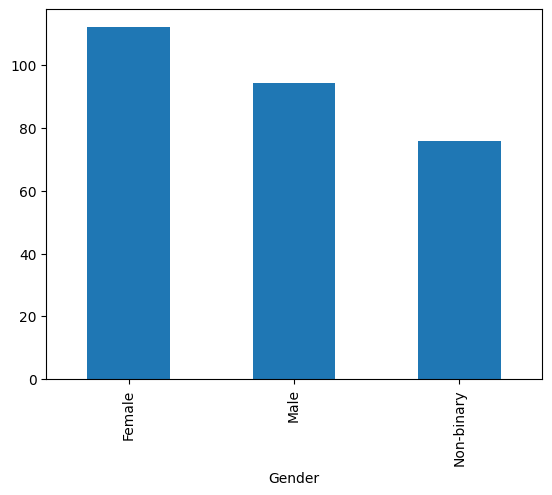

In [45]:
# @title Average Daily Usage Time by Gender
df.groupby('Gender')['Daily_Usage_Time (minutes)'].mean().plot(kind='bar')

In [46]:
#Checking distribution of age column with respect to Gender
fig = px.histogram(df, x='Age', title='Age Distribution by Gender', color = 'Gender', facet_col='Gender')

fig.update_layout(
    width=1000,
    height=500,
    margin=dict(l=25, r=25, t=50, b=20),
)
fig.show()

In [47]:
fig = px.box(df, y='Age', x='Dominant_Emotion', color='Gender', points='all',
                title='Distribution of Dominant Emotions by Age and Gender')

# Update layout for better visualization
fig.update_layout(
    width=1000,
    height=300,  # Increase the height for better visualization
    margin=dict(l=25, r=25, t=50, b=20)
)

# Show the plot
fig.show()

In [18]:
plt = px.histogram(df, x='Gender', title='Gender Distribution', barmode = "overlay", color="Dominant_Emotion")
plt.show()

In [19]:
'''
Checking distribution of gender column with respect to Platform
'''
# plt = px.histogram(df, x='Gender', title='Gender Distribution', barmode = "overlay", color="Dominant_Emotion")
# plt.show()

# Create the box plot using plotly.express
fig = px.violin(df, x='Dominant_Emotion', y='Age', title='Distribution of Dominant Emotions by Age', color='Dominant_Emotion', points = 'all', box = True)

# Show the plot
fig.show()

In [20]:
'''
Checking distribution of age column with respect to Platform
'''
# plt = px.histogram(df, x='Age', title='Age Distribution', barmode = "overlay", color = "Platform")
# plt.show()

fig = px.histogram(df, x='Platform', title='Emotion Distribution by Platform and age', color='Dominant_Emotion', facet_col='Age')

# Update layout to widen the width of each facet
fig.update_layout(
    width=1000,
    height=500,
    margin=dict(l=25, r=25, t=50, b=20),
)

fig.show()

In [21]:
'''
Checking distribution of Platform
'''
plt = px.histogram(df, x='Platform', title='Platform Distribution', barmode = "overlay")
plt.show()

In [22]:
fig = px.pie(df, names='Platform', title='Platform Distribution', hole = 0.5)
fig.show()

In [23]:
fig = px.histogram(df, x='Dominant_Emotion', title='Emotion Distribution by Platform', color='Dominant_Emotion', facet_col='Platform')

# Update layout to widen the width of each facet
fig.update_layout(
    width=1000,
    height=500,
    margin=dict(l=25, r=25, t=50, b=20),
)

fig.show()

In [24]:
'''
Likes Received per Day vs Average Daily Usage Time
'''
daily_usage_time = df["Daily_Usage_Time (minutes)"]
likes_received = df["Likes_Received_Per_Day"]

# Create a scatter plot trace
trace = go.Scatter(
    x=daily_usage_time,
    y=likes_received,
    mode='markers',  # Set marker mode for data points
    marker=dict(  # Customize marker properties
        size=10,  # Adjust marker size
        color="#4285f4",  # Set marker color (optional)
    )
)

# Configure the layout
layout = go.Layout(
    title="Likes Received per Day vs Daily Usage Time",
    xaxis_title="Daily Usage Time (minutes)",
    yaxis_title="Likes Received Per Day",
)

# Create the plotly figure
fig = go.Figure(data=[trace], layout=layout)

# Display the plotly chart
fig.show()

In [25]:
import matplotlib.pyplot as plt

'''
How does the age of users correlate with their dominant emotional state? Are
there specific age groups that tend to experience certain emotions more
frequently when using social media?
'''
# Create a crosstab of age and dominant emotion
age_emotion_crosstab = pd.crosstab(df['Age'], df['Dominant_Emotion'])

# Calculate the percentage of users in each age group who experience each emotion
age_emotion_percentages = age_emotion_crosstab.div(age_emotion_crosstab.sum(axis=1), axis=0)

# Find the most common emotion for each age group
most_common_emotion_by_age = age_emotion_percentages.idxmax(axis=1)

print("Most common emotion by age:")
print(most_common_emotion_by_age)
# Reset index to have 'Age' as a column
age_emotion_percentages = age_emotion_percentages.reset_index()

# Melt the DataFrame to have 'Age' and 'Dominant_Emotion' as categorical variables
df_melted = age_emotion_percentages.melt(id_vars='Age', var_name='Dominant_Emotion', value_name='Percentage')

# Create the bar chart using Plotly Express
fig = px.bar(df_melted, x='Age', y='Percentage', color='Dominant_Emotion',
             title='Dominant Emotion by Age', barmode='stack')

fig.update_layout(xaxis_title='Age', yaxis_title='% of users')

fig.show()


Most common emotion by age:
Age
21      Neutral
22      Neutral
23      Neutral
24        Anger
25    Happiness
26      Anxiety
27        Anger
28      Anxiety
29      Boredom
30        Anger
31      Sadness
32    Happiness
33      Boredom
34      Boredom
35      Boredom
dtype: object


<Axes: xlabel='Posts_Per_Day', ylabel='Likes_Received_Per_Day'>

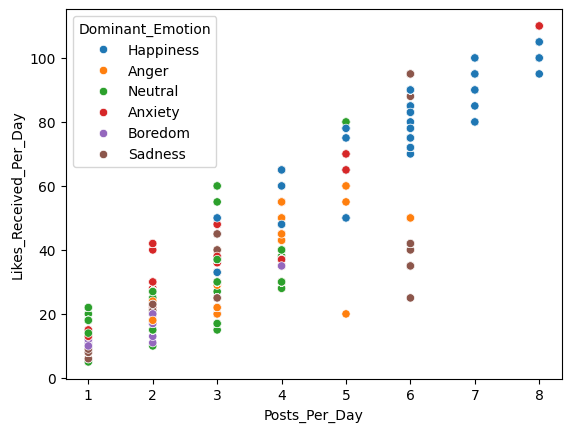

In [26]:
'''
Posts vs Likes per Day
'''
sns.scatterplot(data=df, x='Posts_Per_Day', y='Likes_Received_Per_Day', hue='Dominant_Emotion')

<Axes: xlabel='Posts_Per_Day', ylabel='Comments_Received_Per_Day'>

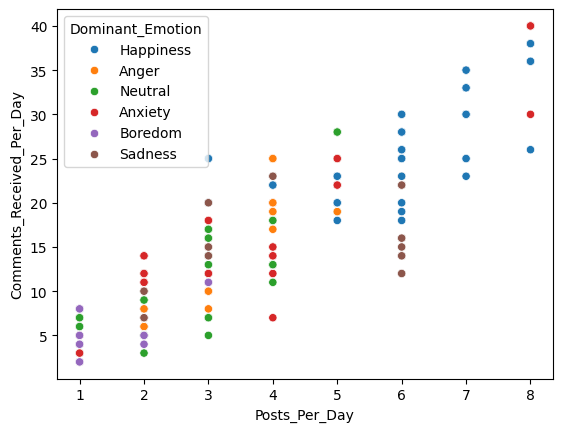

In [27]:
sns.scatterplot(data=df, x='Posts_Per_Day', y='Comments_Received_Per_Day', hue='Dominant_Emotion')

In [28]:
# sns.scatterplot(data=df, x='Daily_Usage_Time (minutes)', y='Comments_Received_Per_Day', hue='Dominant_Emotion')

fig = px.scatter(df, x='Platform', y='Daily_Usage_Time (minutes)', color='Dominant_Emotion',
                 title='Scatter Plot with Dominant Emotion')

fig.show()

Most common emotion by gender:
Gender
Female        Happiness
Male          Happiness
Non-binary      Neutral
dtype: object


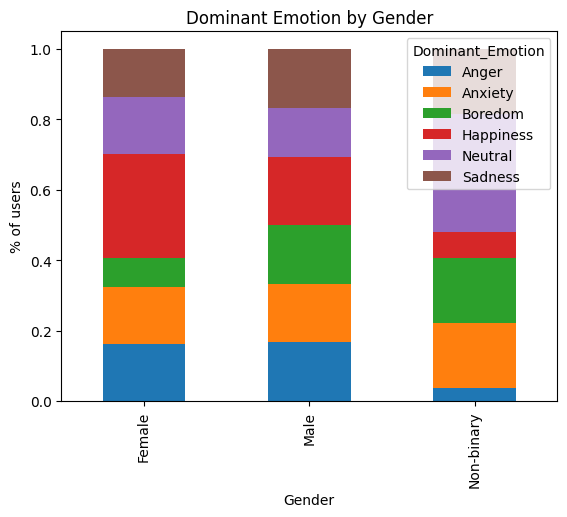

In [29]:
'''
What are the differences in emotional well-being between genders based on social
media usage? Are there specific platforms where one gender reports significantly
different emotional states compared to another?
'''
# Calculate the percentage of users in each gender who experience each emotion
gender_emotion_percentages = df.groupby('Gender')['Dominant_Emotion'].value_counts(normalize=True).unstack()

# Find the most common emotion for each gender
most_common_emotion_by_gender = gender_emotion_percentages.idxmax(axis=1)

print("Most common emotion by gender:")
print(most_common_emotion_by_gender)

# Create a bar chart to visualize the results
gender_emotion_percentages.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('% of users')
plt.title('Dominant Emotion by Gender')
plt.show()

Most common emotion by gender and platform:
Gender      Platform 
Female      Facebook       Neutral
            Instagram    Happiness
            LinkedIn       Boredom
            Snapchat       Anxiety
            Twitter          Anger
            Whatsapp         Anger
Male        Facebook       Anxiety
            Instagram    Happiness
            LinkedIn       Boredom
            Telegram       Neutral
            Twitter          Anger
            Whatsapp         Anger
Non-binary  Facebook       Neutral
            Instagram    Happiness
            LinkedIn       Anxiety
            Snapchat       Sadness
            Telegram         Anger
            Twitter        Boredom
dtype: object


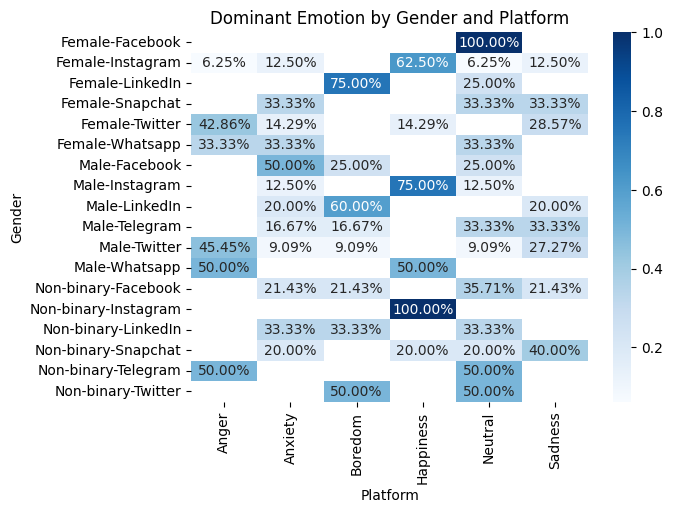

In [30]:
# Group the data by gender and platform
gender_platform_emotion = df.groupby(['Gender', 'Platform'])['Dominant_Emotion'].value_counts(normalize=True).unstack()

# Find the most common emotion for each gender and platform combination
most_common_emotion_by_gender_platform = gender_platform_emotion.idxmax(axis=1)

print("Most common emotion by gender and platform:")
print(most_common_emotion_by_gender_platform)

# Create a heatmap to visualize the results
sns.heatmap(gender_platform_emotion, annot=True, fmt=".2%", cmap="Blues")
plt.xlabel('Platform')
plt.ylabel('Gender')
plt.title('Dominant Emotion by Gender and Platform')
plt.show()

In [31]:
import scipy.stats as stats

# Perform chi-square test on age and dominant emotion
age_emotion_crosstab = pd.crosstab(df['Age'], df['Dominant_Emotion'])
chi2, p, _, _ = stats.chi2_contingency(age_emotion_crosstab)

# Interpret the results
if p < 0.05:
    print("There is a significant association between age and dominant emotion as p_value = ",p)
else:
    print("There is no significant association between age and dominant emotion as p_value = ", p)

# Perform chi-square test on gender and dominant emotion
gender_emotion_crosstab = df.groupby('Gender')['Dominant_Emotion'].value_counts(normalize=True).unstack()
gender_emotion_crosstab = gender_emotion_crosstab.fillna(0)
chi2, p, _, _ = stats.chi2_contingency(gender_emotion_crosstab)

# Interpret the results
if p < 0.05:
    print("There is a significant association between gender and dominant emotion as p_value = ", p)
else:
    print("There is no significant association between gender and dominant emotion as p_value = ", p)

# Perform chi-square test on gender, platform, and dominant emotion
gender_platform_emotion = df.groupby(['Gender', 'Platform'])['Dominant_Emotion'].value_counts(normalize=True).unstack()
gender_platform_emotion = gender_platform_emotion.fillna(0)
chi2, p, _, _ = stats.chi2_contingency(gender_platform_emotion)

# Interpret the results
if p < 0.05:
    print("There is a significant association between gender, platform, and dominant emotion as p_vaue = ",p)
else:
    print("There is no significant association between gender, platform, and dominant emotion as p_value = ", p)


There is a significant association between age and dominant emotion as p_value =  1.5559607953651407e-144
There is no significant association between gender and dominant emotion as p_value =  0.9999982345909878
There is no significant association between gender, platform, and dominant emotion as p_value =  0.9999999908228518


In [32]:
'''
Significance testing on which social media platform is most associated with each dominant emotion (e.g.,
Happiness, Sadness, Anger)?
'''
# Create a crosstab of platform and dominant emotion
platform_emotion_crosstab = pd.crosstab(df['Platform'], df['Dominant_Emotion'])

# Fill missing values with zero
platform_emotion_crosstab = platform_emotion_crosstab.fillna(0)

# Perform chi-square test on platform and dominant emotion
chi2, p, _, _ = stats.chi2_contingency(platform_emotion_crosstab)

# Interpret the results
if p < 0.05:
    print("There is a significant association between platform and dominant emotion as p_value =", p)
else:
    print("There is no significant association between platform and dominant emotion as p_value =", p)

There is a significant association between platform and dominant emotion as p_value = 7.686476515335924e-192


In [33]:
import pandas as pd
import plotly.graph_objects as go

# Assuming your data is already loaded into a pandas dataframe 'df'

# Group the data by platform and dominant emotion
platform_emotion = df.groupby(['Platform', 'Dominant_Emotion']).size().unstack()

# Find the platform with the highest percentage of users for each emotion
most_common_platform_by_emotion = platform_emotion.idxmax(axis=1)

# Create a list of emotions for the chart
emotions = list(platform_emotion.columns)

# Create a list of traces (one for each emotion)
data = []
for emotion in emotions:
  data.append(
      go.Bar(
          x=platform_emotion.index,
          y=platform_emotion[emotion],
          name=emotion
      )
  )

# Configure the layout of the plotly graph
layout = go.Layout(
    title="Dominant Emotion by Platform",
    xaxis_title="Platform",
    yaxis_title="Number of Users",
    barmode='stack'  # Stack the bars on top of each other
)

# Create the plotly figure
fig = go.Figure(data=data, layout=layout)

# Display the plotly chart
fig.show()

# 3.1 Modelling
## Logistic Regression

In [34]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Separate features and target
X = df.drop(['Dominant_Emotion', 'Gender', 'User_ID', 'Platform'], axis=1)
y = df['Dominant_Emotion']

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(X_normalized, y)

accuracy_score = model.score(X_normalized, y)
print("Accuracy:", accuracy_score)


Accuracy: 0.988


In [48]:
Xtest_df = test_df.drop(['Dominant_Emotion', 'Gender', 'Platform', 'User_ID'], axis=1)
Xtest_df_normalised = scaler.transform(Xtest_df)
ytest_df = test_df['Dominant_Emotion']

In [49]:
accuracy_score = model.score(Xtest_df_normalised, ytest_df)
print("Accuracy:", accuracy_score)

Accuracy: 0.8639455782312925


In [50]:
# Predict the dominant emotion for the test set
y_pred = model.predict(Xtest_df_normalised)

# Print the predictions
print(y_pred)


['Happiness' 'Happiness' 'Sadness' 'Anxiety' 'Anxiety' 'Anxiety' 'Anxiety'
 'Boredom' 'Happiness' 'Neutral' 'Sadness' 'Sadness' 'Happiness' 'Sadness'
 'Anxiety' 'Boredom' 'Happiness' 'Sadness' 'Anger' 'Happiness' 'Neutral'
 'Happiness' 'Neutral' 'Anxiety' 'Neutral' 'Anxiety' 'Boredom' 'Anger'
 'Happiness' 'Anxiety' 'Happiness' 'Boredom' 'Sadness' 'Boredom' 'Boredom'
 'Anxiety' 'Neutral' 'Neutral' 'Happiness' 'Happiness' 'Sadness' 'Sadness'
 'Neutral' 'Sadness' 'Anger' 'Happiness' 'Neutral' 'Anxiety' 'Happiness'
 'Happiness' 'Neutral' 'Sadness' 'Sadness' 'Happiness' 'Anxiety'
 'Happiness' 'Sadness' 'Anxiety' 'Happiness' 'Anxiety' 'Happiness'
 'Sadness' 'Anxiety' 'Anxiety' 'Neutral' 'Anxiety' 'Happiness' 'Anxiety'
 'Sadness' 'Sadness' 'Neutral' 'Anxiety' 'Neutral' 'Anxiety' 'Boredom'
 'Neutral' 'Anxiety' 'Boredom' 'Happiness' 'Anxiety' 'Anxiety' 'Anger'
 'Sadness' 'Neutral' 'Neutral' 'Neutral' 'Sadness' 'Neutral' 'Neutral'
 'Boredom' 'Happiness' 'Anger' 'Anxiety' 'Happiness' 'Happiness' 

In [51]:
from sklearn.metrics import classification_report, confusion_matrix

# Print the classification report
print(classification_report(ytest_df, y_pred))


              precision    recall  f1-score   support

       Anger       1.00      0.64      0.78        14
     Anxiety       0.74      1.00      0.85        32
     Boredom       0.83      0.56      0.67        18
   Happiness       0.81      0.89      0.85        28
     Neutral       0.96      0.87      0.91        30
     Sadness       1.00      1.00      1.00        25

    accuracy                           0.86       147
   macro avg       0.89      0.83      0.84       147
weighted avg       0.88      0.86      0.86       147



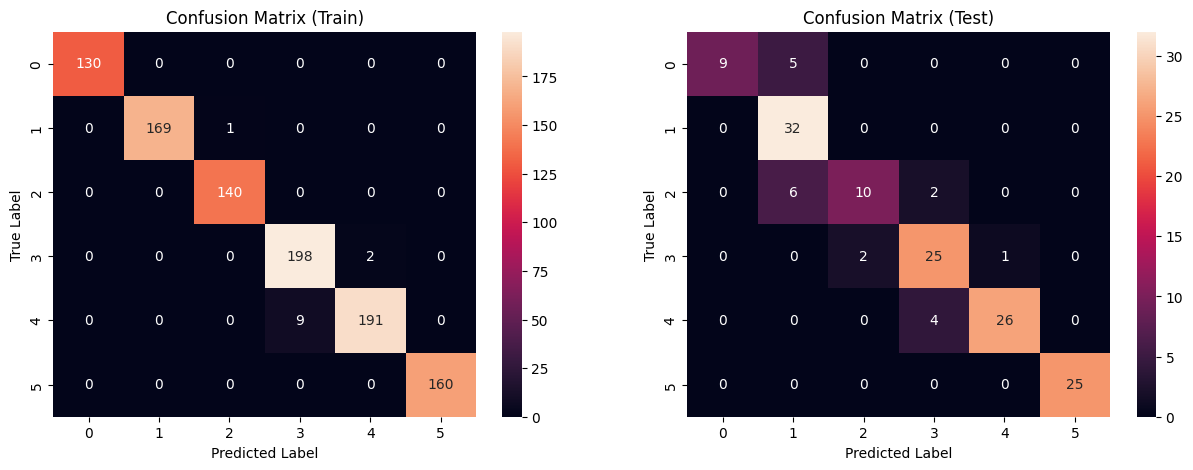

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the confusion matrices
cm_train = confusion_matrix(y, model.predict(X_normalized))
cm_test = confusion_matrix(ytest_df, y_pred)

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt="d", ax=axs[0])
axs[0].set_title("Confusion Matrix (Train)")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt="d", ax=axs[1])
axs[1].set_title("Confusion Matrix (Test)")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")

plt.show()


In [53]:
from sklearn.neural_network import MLPClassifier

model = MLPClassifier(solver='adam', alpha=1e-2, hidden_layer_sizes=(5, 5), max_iter = 1500, random_state=42)

model.fit(X_normalized, y)

score = model.score(X_normalized, y)
print("Train Accuracy:", score)
score = model.score(Xtest_df_normalised, ytest_df)
print("Val Accuracy:", score)

y_pred = model.predict(Xtest_df_normalised)

print(classification_report(ytest_df, y_pred, zero_division=1))

Train Accuracy: 0.99
Val Accuracy: 0.4557823129251701
              precision    recall  f1-score   support

       Anger       0.50      0.14      0.22        14
     Anxiety       0.64      0.94      0.76        32
     Boredom       1.00      0.00      0.00        18
   Happiness       0.36      0.93      0.52        28
     Neutral       0.38      0.30      0.33        30
     Sadness       1.00      0.00      0.00        25

    accuracy                           0.46       147
   macro avg       0.65      0.38      0.31       147
weighted avg       0.62      0.46      0.35       147



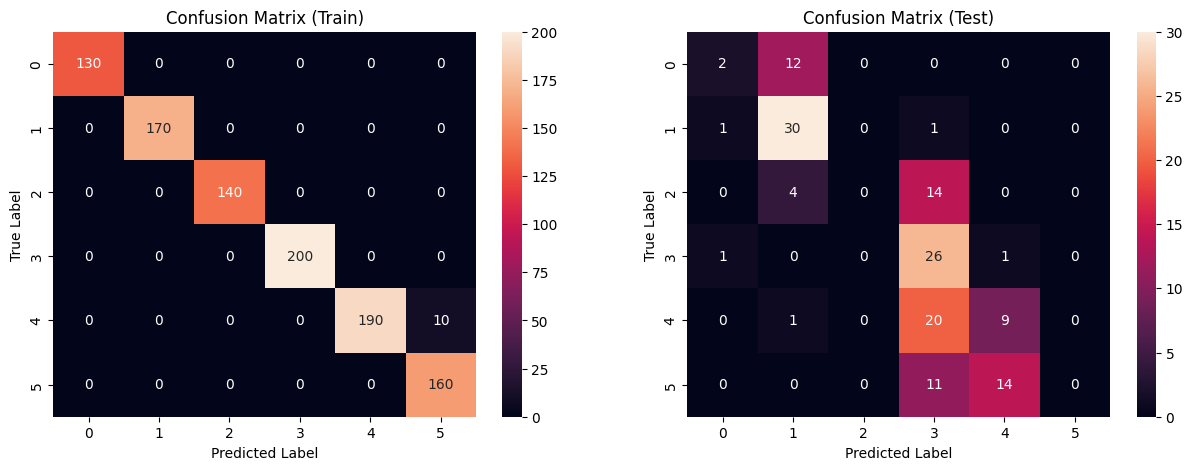

In [54]:
cm_train = confusion_matrix(y, model.predict(X_normalized))
cm_test = confusion_matrix(ytest_df, y_pred)

# Create the figure and subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Plot the confusion matrix for the training set
sns.heatmap(cm_train, annot=True, fmt="d", ax=axs[0])
axs[0].set_title("Confusion Matrix (Train)")
axs[0].set_xlabel("Predicted Label")
axs[0].set_ylabel("True Label")

# Plot the confusion matrix for the test set
sns.heatmap(cm_test, annot=True, fmt="d", ax=axs[1])
axs[1].set_title("Confusion Matrix (Test)")
axs[1].set_xlabel("Predicted Label")
axs[1].set_ylabel("True Label")

# Show the plot
plt.show()